In [4]:
import pandas as pd
import numpy as np
import pyreadr

In [5]:
import pandas as pd


binDF = pd.read_csv("dat_log_zscored_bins10", sep = '\t')
balajiMI = pd.read_csv("mi_values", sep = "\t")
modOnc = pd.read_csv("module_onc_131")

In [22]:
modOnc

,Approved.Symbol
0,ADM
1,ADORA2B
2,AGR2
3,AHR
4,AMPH
...,...
186,ZNF165
187,ZNF185
188,ZNF415
189,ZNF44


In [25]:
binDF["modOnc"] = 0
for i in modOnc.iloc[:,0]:
    if i in binDF.index:
        binDF.loc[i, "modOnc"] = 1


In [476]:
# should I think about vectorization -- doens't matter here because such small values and I just want answer
import math

def mutualInformation(jointDistribution, marginalDistribution1, marginalDistribution2):
    if jointDistribution == 0 or marginalDistribution1 == 0 or marginalDistribution2 == 0:
        return 0
    else:
        return jointDistribution * math.log2(jointDistribution / (marginalDistribution1 * marginalDistribution2))
    
anotherBins = [1,2,3,4,5,6,7,8,9,10]
moduleInclusion = [0,1]

def finalMutualInformation(dataframe, bins, moduleInclusion, binPatientColumn, moduleColumn):
    finalSum = 0
    for i in bins:
        a = dataframe.iloc[:, binPatientColumn] == i
        for j in moduleInclusion:
            b = dataframe.iloc[:, moduleColumn] == j
            c = a & b
            length = len(dataframe.index)
            sum_c = c.sum()
            sum_a = a.sum()
            sum_b = b.sum()

            d = sum_a / length
            e = sum_b / length
            f = sum_c / length

            finalSum += mutualInformation(f, d, e)

    return finalSum

In [470]:
pancOncMI = []
for i in range(177):
    pancOncMI.append(finalMutualInformation(binDF, anotherBins, moduleInclusion, i, 177))
    

pancOncMI

[0.0011497782272210807,
 0.0013228791068955036,
 0.001857979679182171,
 0.0005437584007385791,
 0.0009139457139804089,
 0.0005813921269663218,
 0.0009948495019003428,
 0.0005784942853657041,
 0.0009128459593836463,
 0.0008408017417408991,
 0.0005442981016141172,
 0.00108809796739656,
 0.0019186558251699515,
 0.000737604564169529,
 0.00022742485910016123,
 0.001026722190878037,
 0.0013735351138458205,
 0.0006958152161699235,
 0.000522414158497714,
 0.0007115677271801121,
 0.0018232473333808239,
 0.0003312042950349611,
 0.0016593639725207528,
 0.0013321460104042712,
 0.0003055295062096332,
 0.00037286693514001996,
 0.0015575018293395916,
 0.0006714018293864984,
 0.001081121081583561,
 0.002601749679668821,
 0.0032132518941957794,
 0.0020836316871100497,
 0.002556864231400475,
 0.0029954156249251416,
 0.003138952005284153,
 0.001354343724672736,
 0.0015975389311818492,
 0.00019410940624301984,
 0.0012856356415464187,
 0.0012902892417415873,
 0.000471989665991511,
 0.00043435948440882793,


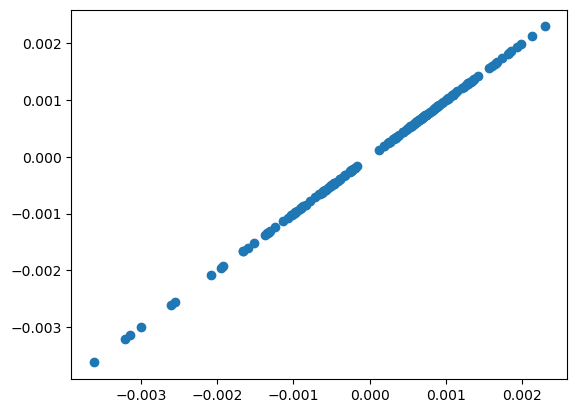

In [302]:
import matplotlib.pyplot as plt
from sklearn.metrics import mutual_info_score

plt.scatter(pancOncMI, balajiMI['signed_mi_user'])

In [30]:
# now, need to sign the mutual information.
# need z-scores of my panc gene expression

pancZscore = pd.read_csv("pancreatic_tumdat_zscore.txt", sep = "\t")


In [32]:
pancZscore.set_index("gene", inplace = True)

In [33]:
for i in range(len(pancZscore.columns)):
    np.corrcoef()

SyntaxError: expected ':' (3541252515.py, line 1)

In [34]:
np.corrcoef(pancZscore.iloc[:,0], binDF.iloc[:,177])

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 18872 and the array at index 1 has size 19495

In [35]:
pancZscore

,TCGA-2J-AAB1-01A-11R-A41B-07,TCGA-2J-AAB4-01A-12R-A41B-07,TCGA-2J-AAB6-01A-11R-A41B-07,TCGA-2J-AAB8-01A-12R-A41B-07,TCGA-2J-AAB9-01A-11R-A41B-07,TCGA-2J-AABA-01A-21R-A41B-07,TCGA-2J-AABE-01A-12R-A41B-07,TCGA-2J-AABF-01A-31R-A41B-07,TCGA-2J-AABH-01A-21R-A41B-07,TCGA-2J-AABI-01A-12R-A41B-07,...,TCGA-XD-AAUG-01A-61R-A41B-07,TCGA-XD-AAUH-01A-42R-A41B-07,TCGA-XD-AAUI-01A-42R-A41B-07,TCGA-XD-AAUL-01A-21R-A39D-07,TCGA-XN-A8T3-01A-11R-A36G-07,TCGA-XN-A8T5-01A-12R-A36G-07,TCGA-YB-A89D-01A-12R-A36G-07,TCGA-YH-A8SY-01A-11R-A37L-07,TCGA-YY-A8LH-01A-11R-A36G-07,TCGA-Z5-AAPL-01A-12R-A41B-07
gene,,,,,,,,,,,,,,,,,,,,,
A1BG,-0.059868,-0.492022,-0.161124,-0.469182,0.125428,0.309559,-0.044985,0.187982,-0.655823,-0.168167,...,1.013675,0.732848,0.749828,0.205296,0.610678,0.569612,0.823514,1.267274,-0.299671,0.593156
A1BG-AS1,-0.040967,-0.408912,-0.102832,-0.077923,0.241319,-0.138049,0.114540,0.719725,-0.603669,-0.901074,...,1.067337,1.624469,1.097223,0.169825,0.178239,0.712279,0.220159,0.350212,-1.134639,1.578830
A1CF,-0.366275,0.303252,-1.034791,-0.102855,-0.565660,-0.521522,-1.261342,1.140346,0.394421,-1.460021,...,0.000378,0.137502,0.812992,0.791646,-0.489331,-0.915372,0.599222,-1.330043,-0.210677,-1.197218
A2M,0.568773,0.262506,-0.889513,0.138645,0.717217,-0.324865,-0.273076,0.592052,0.056489,-2.058076,...,0.973416,0.988627,0.718987,0.758672,0.516724,0.697413,0.832077,-0.974897,-1.719267,-0.330428
A2M-AS1,-0.530164,0.141068,-0.327897,0.687407,-0.033940,0.860509,0.164708,0.413163,-0.643846,3.616562,...,1.134554,1.940809,0.366563,0.153658,0.313742,0.282532,-0.106371,-0.227726,-1.353415,-0.879269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,-0.539344,-0.539344,-0.338898,0.814402,-0.186531,-0.041419,-0.299710,-0.122913,-0.382150,0.822678,...,-0.539344,-0.539344,0.718812,-0.539344,-0.339734,0.144836,-0.539344,-0.347811,-0.539344,2.366809
ZYG11B,-0.336590,0.046918,-0.096914,0.225571,-0.326101,1.217359,-0.265921,0.432713,-0.879666,-1.883358,...,0.351704,0.841367,-0.093033,0.174993,0.354218,0.296744,0.348579,-0.532985,-1.776002,0.430164
ZYX,0.832617,0.216180,1.501198,0.342751,0.691863,0.046568,0.849457,0.475001,0.492913,0.210056,...,0.649574,0.283685,0.471745,1.629658,0.300691,0.684273,1.093965,0.990083,0.055514,0.121117


In [36]:
binDF

,TCGA-2J-AAB1,TCGA-2J-AAB4,TCGA-2J-AAB6,TCGA-2J-AAB8,TCGA-2J-AAB9,TCGA-2J-AABA,TCGA-2J-AABE,TCGA-2J-AABF,TCGA-2J-AABH,TCGA-2J-AABI,...,TCGA-XD-AAUH,TCGA-XD-AAUI,TCGA-XD-AAUL,TCGA-XN-A8T3,TCGA-XN-A8T5,TCGA-YB-A89D,TCGA-YH-A8SY,TCGA-YY-A8LH,TCGA-Z5-AAPL,modOnc
A1BG,6,2,6,2,8,6,5,5,2,5,...,8,9,7,8,8,9,10,4,7,0
A1BG-AS1,6,2,7,5,9,4,6,8,2,2,...,10,10,7,6,8,8,8,2,9,0
A1CF,3,7,2,5,3,2,1,10,8,1,...,5,9,10,2,1,2,1,5,1,0
A2M,9,7,2,6,10,3,3,7,7,1,...,9,9,9,8,8,10,2,1,4,0
A2M-AS1,2,6,5,8,7,9,6,6,2,10,...,10,7,7,7,6,6,6,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,2,2,5,9,6,5,3,3,4,8,...,2,9,2,2,5,7,5,3,10,0
ZYG11B,3,6,7,7,4,10,4,7,1,1,...,8,4,7,7,6,6,4,1,7,0
ZYX,9,7,10,7,10,5,9,7,8,7,...,6,7,10,7,8,10,10,6,6,0
ZZEF1,5,2,3,2,4,8,2,9,4,4,...,8,3,3,7,7,6,3,3,9,0


In [ ]:
# more rows in binDF than in pancZscore

In [37]:
raw_data = pd.read_csv("pancreatic_cancer_gene_exp_File", sep = "\t")

In [40]:
raw_data.set_index("Approved.Symbol", inplace = True)

In [41]:
log2data = np.log2(raw_data + 1)

In [67]:
from scipy.stats import zscore
z_Score_Values = log2data.apply(zscore, axis = 1)

In [70]:
z_Score_Values

,TCGA-2J-AAB1,TCGA-2J-AAB4,TCGA-2J-AAB6,TCGA-2J-AAB8,TCGA-2J-AAB9,TCGA-2J-AABA,TCGA-2J-AABE,TCGA-2J-AABF,TCGA-2J-AABH,TCGA-2J-AABI,...,TCGA-XD-AAUG,TCGA-XD-AAUH,TCGA-XD-AAUI,TCGA-XD-AAUL,TCGA-XN-A8T3,TCGA-XN-A8T5,TCGA-YB-A89D,TCGA-YH-A8SY,TCGA-YY-A8LH,TCGA-Z5-AAPL
Approved.Symbol,,,,,,,,,,,,,,,,,,,,,
A1BG,-0.056185,-0.489875,-0.157801,-0.466954,0.129770,0.314555,-0.041249,0.192546,-0.654257,-0.164869,...,1.021173,0.739348,0.756389,0.209922,0.616744,0.575532,0.597217,1.275673,-0.296840,0.599160
A1BG-AS1,-0.055548,-0.419381,-0.116722,-0.092091,0.223583,-0.151545,0.098221,0.696643,-0.611962,-0.906042,...,1.040369,1.591275,1.069922,0.152888,0.161208,0.689280,0.187822,0.331259,-1.136998,1.546146
A1CF,-0.352697,0.315121,-1.019507,-0.089949,-0.551573,-0.507547,-1.245479,1.150080,0.406058,-1.443651,...,0.013021,0.149795,0.823561,0.802269,-0.475439,-0.900392,-0.834057,-1.314005,-0.197495,-1.181519
A2M,0.548957,0.244313,-0.901602,0.121109,0.696615,-0.339946,-0.288431,0.572113,0.039387,-2.063973,...,0.951456,0.966587,0.698375,0.737850,0.497185,0.676916,1.174379,-0.986534,-1.726960,-0.345479
A2M-AS1,-0.541947,0.113142,-0.344544,0.646342,-0.057657,0.815280,0.136213,0.378694,-0.652894,3.505050,...,1.082735,1.869599,0.333214,0.125430,0.281663,0.251204,-0.073409,-0.246782,-1.345398,-0.882656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,-0.542014,-0.542014,-0.345910,0.782402,-0.196844,-0.054876,-0.307571,-0.134604,-0.388225,0.790499,...,-0.542014,-0.542014,0.688884,-0.542014,-0.346728,0.127344,-0.042676,-0.354630,-0.542014,2.301175
ZYG11B,-0.347453,0.038758,-0.106088,0.218669,-0.336890,1.217446,-0.276285,0.427271,-0.894355,-1.905119,...,0.345691,0.838804,-0.102179,0.167735,0.348223,0.290343,-0.116888,-0.545232,-1.797006,0.424703
ZYX,0.799270,0.191915,1.458001,0.316622,0.660590,0.024802,0.815862,0.446923,0.464571,0.185882,...,0.618924,0.258426,0.443715,1.584567,0.275181,0.653112,1.579494,0.954416,0.033616,0.098253


In [69]:
z_Score_Values = z_Score_Values.filter(binDF.index, axis = "rows")

In [ ]:
# z-score values are a little off
# see which ones fit better

In [59]:
binDF

,TCGA-2J-AAB1,TCGA-2J-AAB4,TCGA-2J-AAB6,TCGA-2J-AAB8,TCGA-2J-AAB9,TCGA-2J-AABA,TCGA-2J-AABE,TCGA-2J-AABF,TCGA-2J-AABH,TCGA-2J-AABI,...,TCGA-XD-AAUH,TCGA-XD-AAUI,TCGA-XD-AAUL,TCGA-XN-A8T3,TCGA-XN-A8T5,TCGA-YB-A89D,TCGA-YH-A8SY,TCGA-YY-A8LH,TCGA-Z5-AAPL,modOnc
A1BG,6,2,6,2,8,6,5,5,2,5,...,8,9,7,8,8,9,10,4,7,0
A1BG-AS1,6,2,7,5,9,4,6,8,2,2,...,10,10,7,6,8,8,8,2,9,0
A1CF,3,7,2,5,3,2,1,10,8,1,...,5,9,10,2,1,2,1,5,1,0
A2M,9,7,2,6,10,3,3,7,7,1,...,9,9,9,8,8,10,2,1,4,0
A2M-AS1,2,6,5,8,7,9,6,6,2,10,...,10,7,7,7,6,6,6,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,2,2,5,9,6,5,3,3,4,8,...,2,9,2,2,5,7,5,3,10,0
ZYG11B,3,6,7,7,4,10,4,7,1,1,...,8,4,7,7,6,6,4,1,7,0
ZYX,9,7,10,7,10,5,9,7,8,7,...,6,7,10,7,8,10,10,6,6,0
ZZEF1,5,2,3,2,4,8,2,9,4,4,...,8,3,3,7,7,6,3,3,9,0


In [47]:
filterbinDf = binDF.filter(pancZscore.index, axis = "rows")

In [48]:
filterbinDf

,TCGA-2J-AAB1,TCGA-2J-AAB4,TCGA-2J-AAB6,TCGA-2J-AAB8,TCGA-2J-AAB9,TCGA-2J-AABA,TCGA-2J-AABE,TCGA-2J-AABF,TCGA-2J-AABH,TCGA-2J-AABI,...,TCGA-XD-AAUH,TCGA-XD-AAUI,TCGA-XD-AAUL,TCGA-XN-A8T3,TCGA-XN-A8T5,TCGA-YB-A89D,TCGA-YH-A8SY,TCGA-YY-A8LH,TCGA-Z5-AAPL,modOnc
A1BG,6,2,6,2,8,6,5,5,2,5,...,8,9,7,8,8,9,10,4,7,0
A1BG-AS1,6,2,7,5,9,4,6,8,2,2,...,10,10,7,6,8,8,8,2,9,0
A1CF,3,7,2,5,3,2,1,10,8,1,...,5,9,10,2,1,2,1,5,1,0
A2M,9,7,2,6,10,3,3,7,7,1,...,9,9,9,8,8,10,2,1,4,0
A2M-AS1,2,6,5,8,7,9,6,6,2,10,...,10,7,7,7,6,6,6,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,2,2,5,9,6,5,3,3,4,8,...,2,9,2,2,5,7,5,3,10,0
ZYG11B,3,6,7,7,4,10,4,7,1,1,...,8,4,7,7,6,6,4,1,7,0
ZYX,9,7,10,7,10,5,9,7,8,7,...,6,7,10,7,8,10,10,6,6,0
ZZEF1,5,2,3,2,4,8,2,9,4,4,...,8,3,3,7,7,6,3,3,9,0


In [51]:
np.corrcoef(filterbinDf.iloc[:,172],filterbinDf.iloc[:,177])

array([[ 1.        , -0.00723796],
       [-0.00723796,  1.        ]])

In [50]:
balajiMI

,samples,signed_mi_user,unsigned_mi_package
0,TCGA-2J-AAB1,0.001150,0.001150
1,TCGA-2J-AAB4,0.001323,0.001323
2,TCGA-2J-AAB6,0.001858,0.001858
3,TCGA-2J-AAB8,0.000544,0.000544
4,TCGA-2J-AAB9,0.000914,0.000914
...,...,...,...
172,TCGA-XN-A8T5,-0.000662,0.000662
173,TCGA-YB-A89D,0.000586,0.000586
174,TCGA-YH-A8SY,0.000641,0.000641
175,TCGA-YY-A8LH,0.000699,0.000699


In [66]:
z_Score_Values.iloc[:,0]

Series([], Name: TCGA-2J-AAB1, dtype: float64)

In [83]:
pancOncMI = pd.DataFrame(pancOncMI)

In [90]:
for idx in range(len(pancOncMI)):
    matrix = np.corrcoef(z_Score_Values.iloc[:,idx],binDF.iloc[:,177])
    if matrix[0][1] < 0:
        pancOncMI.iloc[idx,0] = pancOncMI.iloc[idx,0] * -1

In [91]:
pancOncMI

,0
0,0.001150
1,0.001323
2,0.001858
3,0.000544
4,0.000914
...,...
172,-0.000662
173,0.000586
174,0.000641
175,0.000699


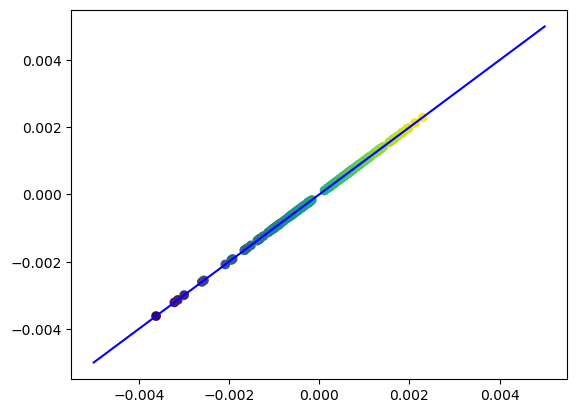

In [101]:
plt.scatter(pancOncMI, balajiMI["signed_mi_user"], c = pancOncMI)
x_line = np.linspace(-0.005, 0.005, 100)
y_line = x_line

# Line plot
plt.plot(x_line, y_line, color='blue', label='Line Plot')

In [ ]:
# need to use all genes in z-score for signed MI

In [ ]:
#now, time to do the real thing with Balaji's data

In [125]:
myModule = pd.read_csv("exampleModule1.csv")
import pyreadr
a = pyreadr.read_r("brca_quant_0.1_primary_zscore_bins10")
a = a[None]
import numpy as np 
genes = np.intersect1d(myModule.iloc[:, 0], a.index)


In [108]:
balajiMPS = pd.read_csv("mps_expression_quant0.1_test", sep = '\t')

In [115]:
balajiMPS

,SAMPLE_ID,sample_TCGA,sample_analyzed,sample_type,days2birth,age,percent_tumor_cells,percent_normal_cells,pathologic_stage,patient_vital_status,...,HER2_category,HR_category,TN_category,MI_signed,MPS,module_id,MPSthresh_0.01,MPSthresh_0.001,MPSthresh_0.05,MPSthresh_0.1
0,TCGA-3C-AAAU,TCGA-3C-AAAU,TCGA-3C-AAAU-01A-11R-A41B-07,primary tumor,-20211,55,70.0,0.0,stage x,alive,...,negative,positive,no,-0.000325,-0.232118,test,0.0,0.0,0.0,0.000000
1,TCGA-3C-AALI,TCGA-3C-AALI,TCGA-3C-AALI-01A-11R-A41B-07,primary tumor,-18538,51,60.0,5.0,stage iib,alive,...,positive,positive,no,-0.000232,0.000000,test,0.0,0.0,0.0,0.000000
2,TCGA-3C-AALJ,TCGA-3C-AALJ,TCGA-3C-AALJ-01A-31R-A41B-07,primary tumor,-22848,63,100.0,0.0,stage iib,alive,...,NaN,positive,no,-0.000257,0.000000,test,0.0,0.0,0.0,0.000000
3,TCGA-3C-AALK,TCGA-3C-AALK,TCGA-3C-AALK-01A-11R-A41B-07,primary tumor,-19074,52,60.0,5.0,stage ia,alive,...,positive,positive,no,0.000276,0.000000,test,0.0,0.0,0.0,0.000000
4,TCGA-4H-AAAK,TCGA-4H-AAAK,TCGA-4H-AAAK-01A-12R-A41B-07,primary tumor,-18371,50,70.0,10.0,stage iiia,alive,...,NaN,positive,no,0.000233,0.000000,test,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,TCGA-W8-A86G,TCGA-W8-A86G,TCGA-W8-A86G-01A-21R-A36F-07,primary tumor,-24125,66,80.0,0.0,stage iia,alive,...,negative,positive,no,0.000238,0.000000,test,0.0,0.0,0.0,0.000000
1058,TCGA-XX-A899,TCGA-XX-A899,TCGA-XX-A899-01A-11R-A36F-07,primary tumor,-17022,47,100.0,0.0,stage iiia,alive,...,negative,positive,no,0.000492,1.437678,test,0.0,0.0,0.0,1.437678
1059,TCGA-XX-A89A,TCGA-XX-A89A,TCGA-XX-A89A-01A-11R-A36F-07,primary tumor,-25000,68,100.0,0.0,stage iib,alive,...,negative,positive,no,0.000384,0.654312,test,0.0,0.0,0.0,0.000000
1060,TCGA-Z7-A8R5,TCGA-Z7-A8R5,TCGA-Z7-A8R5-01A-42R-A41B-07,primary tumor,-22280,61,70.0,0.0,stage iiia,alive,...,negative,positive,no,0.000521,1.645055,test,0.0,0.0,0.0,1.645055


In [126]:
filtA = a.filter(balajiMPS['sample_TCGA'], axis = "columns")

In [127]:
filtA

,TCGA-3C-AAAU,TCGA-3C-AALI,TCGA-3C-AALJ,TCGA-3C-AALK,TCGA-4H-AAAK,TCGA-5L-AAT0,TCGA-5L-AAT1,TCGA-5T-A9QA,TCGA-A1-A0SB,TCGA-A1-A0SD,...,TCGA-S3-AA15,TCGA-S3-AA17,TCGA-UL-AAZ6,TCGA-UU-A93S,TCGA-V7-A7HQ,TCGA-W8-A86G,TCGA-XX-A899,TCGA-XX-A89A,TCGA-Z7-A8R5,TCGA-Z7-A8R6
rownames,,,,,,,,,,,,,,,,,,,,,
A1BG,7,8,10,8,9,7,8,9,1,5,...,7,8,2,9,10,10,8,8,10,9
A1BG-AS1,6,10,8,6,9,7,10,6,2,6,...,6,7,1,6,7,10,4,8,8,8
A2M,2,3,4,5,4,6,7,1,10,10,...,9,6,2,2,4,8,9,8,10,3
A2M-AS1,7,7,3,2,8,7,5,3,6,9,...,7,3,8,1,8,9,6,7,10,1
A2ML1,3,3,3,2,3,2,3,4,4,3,...,4,3,8,5,6,2,2,7,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,9,9,10,9,1,1,3,1,2,1,...,4,4,6,2,4,7,1,9,4,8
ZYG11B,9,2,1,1,5,2,1,1,9,6,...,1,2,1,3,1,1,2,3,1,2
ZYX,6,9,9,10,8,7,8,6,9,6,...,9,6,7,9,8,9,9,9,9,6


In [128]:
filtA["myModule"] = 0
for i in myModule.iloc[:,0]:
    if i in filtA.index:
        filtA.loc[i, "myModule"] = 1
print((filtA["myModule"].value_counts()))

0    17619
1      112
Name: myModule, dtype: int64


In [304]:
filtA

,TCGA-3C-AAAU-01,TCGA-3C-AALI-01,TCGA-3C-AALJ-01,TCGA-3C-AALK-01,TCGA-4H-AAAK-01,TCGA-5L-AAT0-01,TCGA-5T-A9QA-01,TCGA-A1-A0SB-01,TCGA-A1-A0SD-01,TCGA-A1-A0SE-01,...,TCGA-S3-AA17-01,TCGA-UL-AAZ6-01,TCGA-UU-A93S-01,TCGA-V7-A7HQ-01,TCGA-W8-A86G-01,TCGA-XX-A899-01,TCGA-XX-A89A-01,TCGA-Z7-A8R5-01,TCGA-Z7-A8R6-01,myModule
rownames,,,,,,,,,,,,,,,,,,,,,
A1BG,7,8,10,8,9,7,9,1,5,8,...,8,2,9,10,10,8,8,10,9,0
A1BG-AS1,6,10,8,6,9,7,6,2,6,7,...,7,1,6,7,10,4,8,8,8,0
A2M,2,3,4,5,4,6,1,10,10,8,...,6,2,2,4,8,9,8,10,3,0
A2M-AS1,7,7,3,2,8,7,3,6,9,3,...,3,8,1,8,9,6,7,10,1,0
A2ML1,3,3,3,2,3,2,4,4,3,2,...,3,8,5,6,2,2,7,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,9,9,10,9,1,1,1,2,1,3,...,4,6,2,4,7,1,9,4,8,0
ZYG11B,9,2,1,1,5,2,1,9,6,8,...,2,1,3,1,1,2,3,1,2,0
ZYX,6,9,9,10,8,7,6,9,6,4,...,6,7,9,8,9,9,9,9,6,0


In [305]:

brcaPackageMI = []
for i in range(len(filtA.columns)- 1):
    brcaPackageMI.append(mutual_info_score(filtA.iloc[:,i], filtA.iloc[:,1048]))

In [309]:
nullMI

,0
0,0.000234
1,0.000194
2,0.000295
3,0.000388
4,0.000249
...,...
995,0.000328
996,0.000335
997,0.000326
998,0.000441


In [312]:
val = zScorewithNull(brcaPackageMI, nullMI.iloc[:,0])
val

array([-0.13058143, -0.40602314, -0.75854053, ...,  0.73364082,
        2.02903485,  0.36927575])

In [315]:
val = pd.DataFrame(val)

In [316]:
val = val.clip(lower = 0)

In [328]:
val.set_index(z.columns, inplace = True)

In [337]:
z

,TCGA-3C-AAAU-01,TCGA-3C-AALI-01,TCGA-3C-AALJ-01,TCGA-3C-AALK-01,TCGA-4H-AAAK-01,TCGA-5L-AAT0-01,TCGA-5T-A9QA-01,TCGA-A1-A0SB-01,TCGA-A1-A0SD-01,TCGA-A1-A0SE-01,...,TCGA-S3-AA15-01,TCGA-S3-AA17-01,TCGA-UL-AAZ6-01,TCGA-UU-A93S-01,TCGA-V7-A7HQ-01,TCGA-W8-A86G-01,TCGA-XX-A899-01,TCGA-XX-A89A-01,TCGA-Z7-A8R5-01,TCGA-Z7-A8R6-01
0,0.434355,0.664418,1.380607,0.395673,0.818610,0.475576,1.011416,-1.271253,0.032040,0.407273,...,0.356797,0.468773,-1.402856,1.041755,2.486417,1.666599,0.588309,0.753657,1.427469,0.720184
1,-0.587821,-0.587821,-0.587821,-0.587821,1.673164,0.074899,0.016162,1.861031,-0.177520,-0.587821,...,-0.587821,-0.587821,-0.587821,-0.587821,0.101082,2.036513,-0.111216,0.679303,0.084549,-0.587821
2,0.398651,-0.276680,1.212821,-0.502790,1.133463,0.543554,1.887259,-1.399430,-0.381464,-0.275004,...,0.734584,-0.149282,1.500130,1.819567,0.752880,-0.585017,0.838492,-0.059423,-0.028680,-2.123040
3,-0.963554,-0.578961,-0.355763,-0.046004,-0.239156,0.123867,-1.828008,1.481309,1.071136,0.474559,...,1.181395,0.123867,-1.283446,-1.678525,-0.490468,0.694764,0.845741,0.594611,1.701151,-0.623965
4,0.459741,0.330635,-0.646427,-0.587570,0.423772,0.500274,-0.866301,0.235065,0.714442,-0.323089,...,0.427956,-0.428089,0.886020,-2.472066,0.847407,1.069693,0.158765,0.433875,2.198931,-1.879748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18018,1.009026,-0.911358,-1.259480,-0.894112,-0.217325,-0.808399,-2.650772,1.345491,0.093811,0.373987,...,-1.228021,-0.758159,-1.518093,-1.121914,-2.186084,-1.250408,-0.548594,-0.322471,-1.399358,-1.052917
18019,0.006847,0.929997,0.912859,0.998321,0.297311,0.342554,-0.167026,1.169257,0.037229,-0.307736,...,1.198739,-0.085309,0.358117,0.963011,1.255677,0.947015,0.780891,0.919904,1.325033,-0.055237
18020,1.249450,0.358063,-0.466353,-0.928786,-0.774035,-0.521048,-0.054150,1.296195,0.282958,-0.509777,...,0.405731,0.041440,0.211608,-1.843097,-1.036501,-0.396420,1.299452,0.570051,-1.014302,-1.726977
18021,0.696900,-1.819439,-1.287748,-0.534837,0.007380,0.446417,-1.629161,1.160365,0.727018,0.476713,...,-1.557802,-1.966966,-2.455530,-1.940510,-2.509179,-0.021724,-0.640943,0.192859,-0.372196,-1.518254


In [319]:
balajiMPS['sample_TCGA'] = balajiMPS['sample_TCGA'] + "-01"

In [324]:
balajiMPS.set_index(balajiMPS["sample_TCGA"], inplace = True)

In [331]:
val.iloc[:,0]

TCGA-3C-AAAU-01    0.000000
TCGA-3C-AALI-01    0.000000
TCGA-3C-AALJ-01    0.000000
TCGA-3C-AALK-01    0.049207
TCGA-4H-AAAK-01    0.000000
                     ...   
TCGA-W8-A86G-01    0.000000
TCGA-XX-A899-01    1.811117
TCGA-XX-A89A-01    0.733641
TCGA-Z7-A8R5-01    2.029035
TCGA-Z7-A8R6-01    0.369276
Name: 0, Length: 1048, dtype: float64

In [334]:
y = balajiMPS.filter(z.columns.tolist(), axis = "rows" )

In [335]:
y

,SAMPLE_ID,sample_TCGA,sample_analyzed,sample_type,days2birth,age,percent_tumor_cells,percent_normal_cells,pathologic_stage,patient_vital_status,...,HER2_category,HR_category,TN_category,MI_signed,MPS,module_id,MPSthresh_0.01,MPSthresh_0.001,MPSthresh_0.05,MPSthresh_0.1
sample_TCGA,,,,,,,,,,,,,,,,,,,,,
TCGA-3C-AAAU-01,TCGA-3C-AAAU,TCGA-3C-AAAU-01,TCGA-3C-AAAU-01A-11R-A41B-07,primary tumor,-20211,55,70.0,0.0,stage x,alive,...,negative,positive,no,-0.000325,-0.232118,test,0.0,0.0,0.0,0.000000
TCGA-3C-AALI-01,TCGA-3C-AALI,TCGA-3C-AALI-01,TCGA-3C-AALI-01A-11R-A41B-07,primary tumor,-18538,51,60.0,5.0,stage iib,alive,...,positive,positive,no,-0.000232,0.000000,test,0.0,0.0,0.0,0.000000
TCGA-3C-AALJ-01,TCGA-3C-AALJ,TCGA-3C-AALJ-01,TCGA-3C-AALJ-01A-31R-A41B-07,primary tumor,-22848,63,100.0,0.0,stage iib,alive,...,NaN,positive,no,-0.000257,0.000000,test,0.0,0.0,0.0,0.000000
TCGA-3C-AALK-01,TCGA-3C-AALK,TCGA-3C-AALK-01,TCGA-3C-AALK-01A-11R-A41B-07,primary tumor,-19074,52,60.0,5.0,stage ia,alive,...,positive,positive,no,0.000276,0.000000,test,0.0,0.0,0.0,0.000000
TCGA-4H-AAAK-01,TCGA-4H-AAAK,TCGA-4H-AAAK-01,TCGA-4H-AAAK-01A-12R-A41B-07,primary tumor,-18371,50,70.0,10.0,stage iiia,alive,...,NaN,positive,no,0.000233,0.000000,test,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-W8-A86G-01,TCGA-W8-A86G,TCGA-W8-A86G-01,TCGA-W8-A86G-01A-21R-A36F-07,primary tumor,-24125,66,80.0,0.0,stage iia,alive,...,negative,positive,no,0.000238,0.000000,test,0.0,0.0,0.0,0.000000
TCGA-XX-A899-01,TCGA-XX-A899,TCGA-XX-A899-01,TCGA-XX-A899-01A-11R-A36F-07,primary tumor,-17022,47,100.0,0.0,stage iiia,alive,...,negative,positive,no,0.000492,1.437678,test,0.0,0.0,0.0,1.437678
TCGA-XX-A89A-01,TCGA-XX-A89A,TCGA-XX-A89A-01,TCGA-XX-A89A-01A-11R-A36F-07,primary tumor,-25000,68,100.0,0.0,stage iib,alive,...,negative,positive,no,0.000384,0.654312,test,0.0,0.0,0.0,0.000000


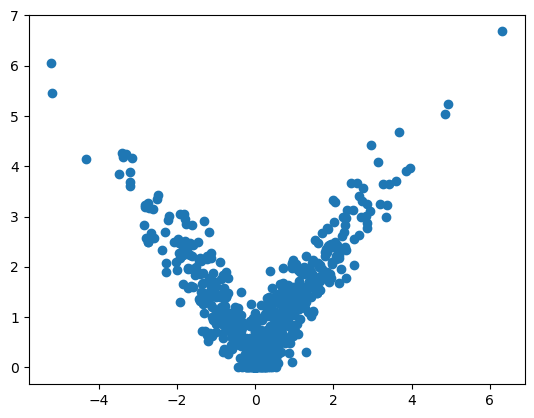

In [336]:
plt.scatter(y["MPS"], val.iloc[:,0])

# looks okay

In [340]:
val.iloc[0,:]

0    0.0
Name: TCGA-3C-AAAU-01, dtype: float64

In [9]:
x = pyreadr.read_r("brca_quant_0.1_primary_zscore")
x = x[None]
x

,TCGA-3C-AAAU,TCGA-3C-AALI,TCGA-3C-AALJ,TCGA-3C-AALK,TCGA-4H-AAAK,TCGA-5L-AAT0,TCGA-5L-AAT1,TCGA-5T-A9QA,TCGA-A1-A0SB,TCGA-A1-A0SD,...,TCGA-UU-A93S,TCGA-V7-A7HQ,TCGA-W8-A86G,TCGA-WT-AB41,TCGA-WT-AB44,TCGA-XX-A899,TCGA-XX-A89A,TCGA-Z7-A8R5,TCGA-Z7-A8R6,gene
rownames,,,,,,,,,,,,,,,,,,,,,
A1BG,0.481291,0.652369,1.491583,0.292675,0.815615,0.470376,0.512949,1.205024,-1.319772,0.014864,...,0.988173,2.417477,1.854820,-0.404820,1.574154,0.626233,0.667675,1.394561,0.774441,A1BG
A1BG-AS1,0.257242,1.578377,0.812314,-0.091635,0.829827,0.346237,1.321719,-0.066472,-1.267525,0.144329,...,-0.253697,0.294729,1.758155,-0.471068,0.785424,-0.103944,0.524053,0.826002,0.590553,A1BG-AS1
A2M,-0.883824,-0.582299,-0.315506,-0.118233,-0.246522,0.152814,0.470081,-1.663932,1.455053,1.130240,...,-1.775928,-0.799201,0.783823,-0.423210,-1.100090,0.917164,0.513538,1.605713,-0.562868,A2M
A2M-AS1,0.497894,0.240149,-0.656611,-0.724731,0.331286,0.460109,0.008953,-0.706503,0.084426,0.732840,...,-1.930025,0.389484,1.208861,0.702081,0.762677,0.137989,0.234055,2.367656,-1.535826,A2M-AS1
A2ML1,-0.569646,-0.477235,-0.621590,-0.565880,-0.506694,-0.578896,-0.483883,-0.621590,-0.516945,-0.379271,...,-0.621590,-0.257364,-0.568210,-0.621590,-0.418722,-0.606613,0.304963,-0.544560,-0.476757,A2ML1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,1.400645,1.014184,1.667100,0.810533,-1.424398,-1.342736,-0.387677,-1.986308,-1.247298,-0.806563,...,-1.550665,-0.849619,0.425377,-0.649624,0.197398,-1.137041,0.723603,-0.506543,0.656583,ZYG11A
ZYG11B,1.096770,-0.843968,-1.091775,-0.957145,-0.213595,-0.703212,-1.222008,-2.128246,1.182275,0.171178,...,-1.189224,-2.536962,-1.015376,-3.541958,-2.531822,-0.400243,-0.454945,-1.491644,-0.860798,ZYG11B
ZYX,0.136416,0.985595,1.029660,0.948146,0.304849,0.401936,0.537199,0.087375,1.175708,0.109810,...,0.891594,0.873414,1.123915,1.131169,2.433873,0.919258,0.842827,1.234333,0.038766,ZYX


In [513]:
m = pyreadr.read_r("brca_quant_0.1_primary_zscore_bins10")
m = m[None]
m

,TCGA-3C-AAAU,TCGA-3C-AALI,TCGA-3C-AALJ,TCGA-3C-AALK,TCGA-4H-AAAK,TCGA-5L-AAT0,TCGA-5L-AAT1,TCGA-5T-A9QA,TCGA-A1-A0SB,TCGA-A1-A0SD,...,TCGA-UU-A93S,TCGA-V7-A7HQ,TCGA-W8-A86G,TCGA-WT-AB41,TCGA-WT-AB44,TCGA-XX-A899,TCGA-XX-A89A,TCGA-Z7-A8R5,TCGA-Z7-A8R6,gene
rownames,,,,,,,,,,,,,,,,,,,,,
A1BG,7,8,10,8,9,7,8,9,1,5,...,9,10,10,5,10,8,8,10,9,A1BG
A1BG-AS1,6,10,8,6,9,7,10,6,2,6,...,6,7,10,5,8,4,8,8,8,A1BG-AS1
A2M,2,3,4,5,4,6,7,1,10,10,...,2,4,8,5,2,9,8,10,3,A2M
A2M-AS1,7,7,3,2,8,7,5,3,6,9,...,1,8,9,8,8,6,7,10,1,A2M-AS1
A2ML1,3,3,3,2,3,2,3,4,4,3,...,5,6,2,4,4,2,7,3,3,A2ML1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,9,9,10,9,1,1,3,1,2,1,...,2,4,7,4,7,1,9,4,8,ZYG11A
ZYG11B,9,2,1,1,5,2,1,1,9,6,...,3,1,1,1,1,2,3,1,2,ZYG11B
ZYX,6,9,9,10,8,7,8,6,9,6,...,9,8,9,9,10,9,9,9,6,ZYX


In [372]:
balajiMPS_2 = pd.read_csv("mps_expression_quant0.1_test", sep = "\t")

balajiMPS_2.set_index("sample_TCGA", inplace = True)

In [514]:
m = m.filter(balajiMPS_2.index, axis = "columns")

In [458]:
m["myModule"].value_counts()

0    17619
1      112
Name: myModule, dtype: int64

In [8]:
x= x.filter(balajiMPS_2.index, axis = "columns")

NameError: name 'x' is not defined

In [381]:
x

,TCGA-3C-AAAU,TCGA-3C-AALI,TCGA-3C-AALJ,TCGA-3C-AALK,TCGA-4H-AAAK,TCGA-5L-AAT0,TCGA-5L-AAT1,TCGA-5T-A9QA,TCGA-A1-A0SB,TCGA-A1-A0SD,...,TCGA-S3-AA15,TCGA-S3-AA17,TCGA-UL-AAZ6,TCGA-UU-A93S,TCGA-V7-A7HQ,TCGA-W8-A86G,TCGA-XX-A899,TCGA-XX-A89A,TCGA-Z7-A8R5,TCGA-Z7-A8R6
rownames,,,,,,,,,,,,,,,,,,,,,
A1BG,0.481291,0.652369,1.491583,0.292675,0.815615,0.470376,0.512949,1.205024,-1.319772,0.014864,...,0.236756,0.487572,-1.493565,0.988173,2.417477,1.854820,0.626233,0.667675,1.394561,0.774441
A1BG-AS1,0.257242,1.578377,0.812314,-0.091635,0.829827,0.346237,1.321719,-0.066472,-1.267525,0.144329,...,0.018012,0.299459,-1.781050,-0.253697,0.294729,1.758155,-0.103944,0.524053,0.826002,0.590553
A2M,-0.883824,-0.582299,-0.315506,-0.118233,-0.246522,0.152814,0.470081,-1.663932,1.455053,1.130240,...,1.105335,0.179433,-1.424125,-1.775928,-0.799201,0.783823,0.917164,0.513538,1.605713,-0.562868
A2M-AS1,0.497894,0.240149,-0.656611,-0.724731,0.331286,0.460109,0.008953,-0.706503,0.084426,0.732840,...,0.226704,-0.450337,0.674706,-1.930025,0.389484,1.208861,0.137989,0.234055,2.367656,-1.535826
A2ML1,-0.569646,-0.477235,-0.621590,-0.565880,-0.506694,-0.578896,-0.483883,-0.621590,-0.516945,-0.379271,...,-0.360956,-0.605208,0.824322,-0.621590,-0.257364,-0.568210,-0.606613,0.304963,-0.544560,-0.476757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,1.400645,1.014184,1.667100,0.810533,-1.424398,-1.342736,-0.387677,-1.986308,-1.247298,-0.806563,...,-0.432678,-0.365866,-0.178225,-1.550665,-0.849619,0.425377,-1.137041,0.723603,-0.506543,0.656583
ZYG11B,1.096770,-0.843968,-1.091775,-0.957145,-0.213595,-0.703212,-1.222008,-2.128246,1.182275,0.171178,...,-1.291674,-0.609937,-1.631975,-1.189224,-2.536962,-1.015376,-0.400243,-0.454945,-1.491644,-0.860798
ZYX,0.136416,0.985595,1.029660,0.948146,0.304849,0.401936,0.537199,0.087375,1.175708,0.109810,...,1.137223,-0.011320,0.182539,0.891594,0.873414,1.123915,0.919258,0.842827,1.234333,0.038766


In [463]:
m

,TCGA-3C-AAAU,TCGA-3C-AALI,TCGA-3C-AALJ,TCGA-3C-AALK,TCGA-4H-AAAK,TCGA-5L-AAT0,TCGA-5L-AAT1,TCGA-5T-A9QA,TCGA-A1-A0SB,TCGA-A1-A0SD,...,TCGA-S3-AA17,TCGA-UL-AAZ6,TCGA-UU-A93S,TCGA-V7-A7HQ,TCGA-W8-A86G,TCGA-XX-A899,TCGA-XX-A89A,TCGA-Z7-A8R5,TCGA-Z7-A8R6,myModule
0,7,8,10,8,9,7,8,9,1,5,...,8,2,9,10,10,8,8,10,9,0
1,6,10,8,6,9,7,10,6,2,6,...,7,1,6,7,10,4,8,8,8,0
2,2,3,4,5,4,6,7,1,10,10,...,6,2,2,4,8,9,8,10,3,0
3,7,7,3,2,8,7,5,3,6,9,...,3,8,1,8,9,6,7,10,1,0
4,3,3,3,2,3,2,3,4,4,3,...,3,8,5,6,2,2,7,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17726,9,9,10,9,1,1,3,1,2,1,...,4,6,2,4,7,1,9,4,8,0
17727,9,2,1,1,5,2,1,1,9,6,...,2,1,3,1,1,2,3,1,2,0
17728,6,9,9,10,8,7,8,6,9,6,...,6,7,9,8,9,9,9,9,6,0
17729,9,7,4,1,2,3,8,7,9,7,...,6,6,1,3,4,10,8,2,1,0


In [486]:
intersection = np.intersect1d(x.index, myModule.iloc[:,0])
intersection

array(['ABHD4', 'ACAA1', 'ACACA', 'ACAT2', 'ACSM1', 'ACTA1', 'ALPL',
       'APC', 'APPBP2', 'ATF5', 'ATG14', 'BMP1', 'BTG2', 'CBLB', 'CCNA1',
       'CCNG2', 'CDK5R1', 'CDKN1A', 'CEBPD', 'CFLAR', 'CNDP2', 'CROCC',
       'CYP2A6', 'DDB2', 'DDX42', 'DNAJB6', 'DRC3', 'DUSP1', 'DYRK3',
       'E2F2', 'ERMP1', 'EYA2', 'FAS', 'FHOD3', 'GADD45A', 'GDPD5',
       'GPHN', 'GSTA3', 'HEXIM1', 'HSPA1A', 'HSPA8', 'HSPB1', 'HSPD1',
       'IKBKB', 'IL15', 'IL1B', 'INPP1', 'INPP5D', 'KATNA1', 'KIAA0319L',
       'LTBP2', 'MAK', 'MAP7', 'MAPK8', 'MDM2', 'MICALL1', 'MNAT1',
       'MYL2', 'MYL3', 'MYL9', 'MZF1', 'NEK11', 'NFKB2', 'NIPSNAP1',
       'NME5', 'NOL3', 'NOTCH1', 'NOTCH2', 'NPC1', 'P4HTM', 'PCBD1',
       'PEX11A', 'PIK3CA', 'PIP4K2B', 'PML', 'PNKP', 'PPBP', 'PPIP5K2',
       'PRKAG2', 'PRKCQ', 'RAB21', 'RBKS', 'RBP4', 'SESN1', 'SLC11A2',
       'SLC22A1', 'SPA17', 'SSBP2', 'STEAP3', 'TBC1D9B', 'TCTN1',
       'TGFBR2', 'THG1L', 'TNFRSF10D', 'TNNC1', 'TNNI2', 'TP53', 'TP53I3',
       'TRAK

In [504]:
genesInList = []
for i in myModule.iloc[:,0].tolist():
    if i in common_genes.iloc[:,0].tolist():
        genesInList.append(i)

In [505]:
len(genesInList)

109

In [506]:
genesInList = pd.DataFrame(genesInList)

In [526]:
write_dataframe_to_csv(genesInList, "genesInList")

In [528]:
m = m.filter(common_genes.iloc[:,0], axis = "rows")

In [515]:
m["myModule"] = 0
for i in genesInList.iloc[:,0]:
    if i in m.index:
        m.loc[i, "myModule"] = 1
print((m["myModule"].value_counts()))

0    17622
1      109
Name: myModule, dtype: int64


In [518]:
m.iloc[:, 1062]

rownames
A1BG        0
A1BG-AS1    0
A2M         0
A2M-AS1     0
A2ML1       0
           ..
ZYG11A      0
ZYG11B      0
ZYX         0
ZZEF1       0
ZZZ3        0
Name: myModule, Length: 17731, dtype: int64

In [529]:
moreMI = []
for i in range(1062):
    moreMI.append(mutual_info_score(m.iloc[:,i], m.iloc[:,1062]))

In [521]:
moreMoreMI = []
for i in range(1062):
    moreMoreMI.append(finalMutualInformation(m, anotherBins, moduleInclusion, i, 1062))

In [482]:
moreMoreMI = pd.DataFrame(moreMoreMI)

In [530]:
moreMI

[0.0003252412574513814,
 0.00023249956310817527,
 0.00025732821775347565,
 0.00027623134778537606,
 0.00023265886772354553,
 7.199451102523268e-05,
 0.00019282094420630452,
 0.0002897721624607456,
 0.0004827046996794162,
 0.0002789927320674228,
 0.0007016412502230788,
 0.0005104234008968399,
 0.0006137966811843331,
 0.0002536256578624268,
 0.000394652783053158,
 0.00025306523624010237,
 0.0006542202801938517,
 0.00035463913770056527,
 0.000377113346102154,
 0.00045097655374951983,
 0.0004029980686633841,
 0.00024574291624010827,
 0.0005746044977991359,
 0.00047603758678619386,
 0.0005671200647087603,
 0.0002455919143810482,
 0.00023982297145418163,
 0.0005483143964966823,
 0.00015761169830937624,
 0.0005327477089694817,
 0.00044510144782090714,
 7.962479934026665e-05,
 7.403219053624295e-05,
 0.00011698287599316674,
 0.0002695960026851355,
 0.0004142176830999487,
 0.00035871281419085077,
 0.0002399397048141981,
 0.00020889697383671274,
 0.0004893889701873765,
 0.00036217943090371225,
 

In [13]:
common_genes = pyreadr.read_r("common_genes_quant_0.1")
common_genes = common_genes[None]


In [480]:
moreMoreMI.dtypes

0    float64
dtype: object

In [390]:
balajiMPS_2

,SAMPLE_ID,sample_analyzed,sample_type,days2birth,age,percent_tumor_cells,percent_normal_cells,pathologic_stage,patient_vital_status,death_event_binary,...,HER2_category,HR_category,TN_category,MI_signed,MPS,module_id,MPSthresh_0.01,MPSthresh_0.001,MPSthresh_0.05,MPSthresh_0.1
sample_TCGA,,,,,,,,,,,,,,,,,,,,,
TCGA-3C-AAAU,TCGA-3C-AAAU,TCGA-3C-AAAU-01A-11R-A41B-07,primary tumor,-20211,55,70.0,0.0,stage x,alive,0,...,negative,positive,no,-0.000325,-0.232118,test,0.0,0.0,0.0,0.000000
TCGA-3C-AALI,TCGA-3C-AALI,TCGA-3C-AALI-01A-11R-A41B-07,primary tumor,-18538,51,60.0,5.0,stage iib,alive,0,...,positive,positive,no,-0.000232,0.000000,test,0.0,0.0,0.0,0.000000
TCGA-3C-AALJ,TCGA-3C-AALJ,TCGA-3C-AALJ-01A-31R-A41B-07,primary tumor,-22848,63,100.0,0.0,stage iib,alive,0,...,NaN,positive,no,-0.000257,0.000000,test,0.0,0.0,0.0,0.000000
TCGA-3C-AALK,TCGA-3C-AALK,TCGA-3C-AALK-01A-11R-A41B-07,primary tumor,-19074,52,60.0,5.0,stage ia,alive,0,...,positive,positive,no,0.000276,0.000000,test,0.0,0.0,0.0,0.000000
TCGA-4H-AAAK,TCGA-4H-AAAK,TCGA-4H-AAAK-01A-12R-A41B-07,primary tumor,-18371,50,70.0,10.0,stage iiia,alive,0,...,NaN,positive,no,0.000233,0.000000,test,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-W8-A86G,TCGA-W8-A86G,TCGA-W8-A86G-01A-21R-A36F-07,primary tumor,-24125,66,80.0,0.0,stage iia,alive,0,...,negative,positive,no,0.000238,0.000000,test,0.0,0.0,0.0,0.000000
TCGA-XX-A899,TCGA-XX-A899,TCGA-XX-A899-01A-11R-A36F-07,primary tumor,-17022,47,100.0,0.0,stage iiia,alive,0,...,negative,positive,no,0.000492,1.437678,test,0.0,0.0,0.0,1.437678
TCGA-XX-A89A,TCGA-XX-A89A,TCGA-XX-A89A-01A-11R-A36F-07,primary tumor,-25000,68,100.0,0.0,stage iib,alive,0,...,negative,positive,no,0.000384,0.654312,test,0.0,0.0,0.0,0.000000


In [427]:
m.iloc[:,1062]

0        0
1        0
2        0
3        0
4        0
        ..
17726    0
17727    0
17728    0
17729    0
17730    0
Name: myModule, Length: 17731, dtype: int64

In [395]:
def zeroListMaker(n):
    listofzeroes = [0] * n 
    return listofzeroes

def oneListMaker(n):
    listofones = [1] * n
    return listofones

def randomModules(df, module, numRandomizations = 1000):
    # choosing a random seed
    np.random.seed(101)
    df.reset_index(inplace = True, drop = True)
    
    # df.drop(columns = ['REF'])
    index = len(df.index)
    finalDataFrame = pd.DataFrame()
    lengthModule = module.value_counts()[1]
    for i in range(numRandomizations):
        includedGeneLength = oneListMaker(lengthModule)
        otherGene = zeroListMaker(index - lengthModule)
        allGene = pd.Series(includedGeneLength + otherGene)
        pd.Series(np.random.shuffle(allGene))
        finalDataFrame[str(i) + " iteration"] = allGene
         # finalDataFrame = pd.concat([finalDataFrame, allGene],axis = 1)

    return finalDataFrame

In [531]:
randomizedModules = randomModules(m, m.iloc[:,1062], numRandomizations = 1000)

/tmp/ipykernel_14600/3422628925.py:22: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  pd.Series(np.random.shuffle(allGene))
/tmp/ipykernel_14600/3422628925.py:22: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.Series(np.random.shuffle(allGene))
/tmp/ipykernel_14600/3422628925.py:22: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  pd.Series(np.random.shuffle(allGene))
/tmp/ipykernel_14600/3422628925.py:22: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a fu

In [532]:
write_dataframe_to_csv(randomizedModules, "randomizedModules_1000_109_115000")

In [533]:
randomizedModules["999 iteration"].value_counts()

0    15758
1      109
Name: 999 iteration, dtype: int64

In [402]:
write_dataframe_to_csv(randomizedModules, "randomizedModules_1000_112_17619")

In [534]:
nullMI = []
for i in range(len(randomizedModules.columns)):
    nullMI.append(mutual_info_score(m.iloc[:,0], randomizedModules.iloc[:,i]))

In [443]:
longNullMI = []
for i in range(len(randomizedModules.columns)):
    longNullMI.append(mutual_info_score(m.iloc[:,0], randomizedModules.iloc[:,i]))

In [541]:
moduleDF = m.iloc[:,1062]

In [418]:
moduleDF = pd.DataFrame(moduleDF)
moduleDF.iloc[:,0]

0        0
1        0
2        0
3        0
4        0
        ..
17726    0
17727    0
17728    0
17729    0
17730    0
Name: myModule, Length: 17731, dtype: int64

In [439]:
pd.set_option("display.precision", 10)


In [446]:
longNullMI = pd.DataFrame(longNullMI)
print(longNullMI.mean())
print(longNullMI.std())

0    0.0002613357
dtype: float64
0    0.0001218723
dtype: float64


In [481]:
longNullMI.iloc[:,0].mean()

0.0002613357140888721

In [442]:
nullMI = pd.DataFrame(nullMI)
print(nullMI.mean())
print(nullMI.std())

0    0.0002558865
dtype: float64
0    0.000116739
dtype: float64


In [7]:
x = x.filter(common_genes.iloc[:,0], axis = "rows")

NameError: name 'x' is not defined

In [548]:
def zScorewithNull(calcMI, nullMIScores):
    calcMI = pd.DataFrame(calcMI)
    nullMIScores = pd.DataFrame(nullMIScores) 
    val = ( (calcMI - nullMIScores.mean()) / nullMIScores.std() ) 
    return val


def calcMPS(allMI, nullMIScores, df, moduleDF, moduleNum = 0):
    #z scoring mutual information based off null distribution
    val = zScorewithNull(allMI, nullMIScores)

    moduleDF = pd.DataFrame(moduleDF)

    # makes every value less than zero, zero
    val = pd.DataFrame(val.clip(lower = 0))

    for idx in range(len(val)):
        matrix = np.corrcoef(moduleDF.iloc[:,moduleNum],df.iloc[:,idx])
        if matrix[0][1] < 0:
            val.iloc[idx,0] = val.iloc[idx,0] * -1
            
    
    return val




In [552]:
"""
Function that calculates MPS Score
Uses zScorewithNull function
calcMI: list calculated mutual information scores
nullMIScores: list of null MI scores
df: dataframe of gene expression
moduleDF: df with module inclusion
moduleNum: which module in the moduleDF is selected
"""

val = calcMPS(allMI = moreMI,nullMIScores = nullMI, df = x, moduleDF = moduleDF)

In [538]:
val

,0
0,-0.2326949860
1,-0.0000000000
2,-0.0000000000
3,0.0000000000
4,0.0000000000
...,...
1057,0.0000000000
1058,1.4206798307
1059,0.6487343655
1060,1.6250336855


In [540]:
balajiMPS_2["MPS"]

sample_TCGA
TCGA-3C-AAAU   -0.2321183411
TCGA-3C-AALI    0.0000000000
TCGA-3C-AALJ    0.0000000000
TCGA-3C-AALK    0.0000000000
TCGA-4H-AAAK    0.0000000000
                    ...     
TCGA-W8-A86G    0.0000000000
TCGA-XX-A899    1.4376777348
TCGA-XX-A89A    0.6543124325
TCGA-Z7-A8R5    1.6450547147
TCGA-Z7-A8R6   -0.8028408410
Name: MPS, Length: 1062, dtype: float64

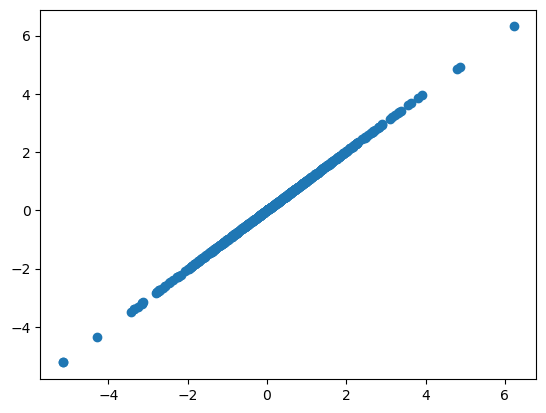

In [553]:
plt.scatter(val.iloc[:,0], balajiMPS_2["MPS"])

In [422]:
write_dataframe_to_csv(val, "MPSScores_14")

In [424]:
len(nullMI)

1000

In [ ]:
#come back

In [124]:
raw_gene_exp = pd.read_csv("data_mrna_seq_v2_rsem.txt", sep = '\t')

In [132]:
raw_gene_exp

,Hugo_Symbol,TCGA-3C-AAAU-01,TCGA-3C-AALI-01,TCGA-3C-AALJ-01,TCGA-3C-AALK-01,TCGA-4H-AAAK-01,TCGA-5L-AAT0-01,TCGA-5T-A9QA-01,TCGA-A1-A0SB-01,TCGA-A1-A0SD-01,...,TCGA-UL-AAZ6-01,TCGA-UU-A93S-01,TCGA-V7-A7HQ-01,TCGA-W8-A86G-01,TCGA-WT-AB41-01,TCGA-WT-AB44-01,TCGA-XX-A899-01,TCGA-XX-A89A-01,TCGA-Z7-A8R5-01,TCGA-Z7-A8R6-01
Entrez_Gene_Id,,,,,,,,,,,,,,,,,,,,,
100134869,UBE2Q2P2,12.9316,17.3790,9.2294,11.0799,14.4298,13.6090,8.9958,14.3935,11.3241,...,14.3720,10.8828,3.0792,14.3711,6.3091,3.2580,21.4409,27.2744,7.2933,24.7795
10357,HMGB1P1,52.1503,69.7553,154.2970,143.8640,84.2128,114.2570,107.5630,116.3870,60.2630,...,135.6240,136.1290,29.9974,128.3150,53.6278,42.2643,137.7760,64.1427,85.0461,167.5510
26823,RNU12-2P,0.0000,1.0875,0.0000,0.4137,0.4255,0.0000,0.5230,0.4505,0.3308,...,0.0000,0.0000,0.6158,0.4746,0.0000,4.0725,2.7559,0.4724,0.5973,0.3480
280660,SSX9P,0.0000,0.5438,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.7984,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
340602,EZHIP,1.7233,144.1000,0.0000,0.0000,0.4255,0.0000,0.0000,0.9010,0.6616,...,0.0000,23.1548,0.0000,0.9492,4.7319,0.8145,2.7559,17.4776,0.0000,0.3480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440590,ZYG11A,258.4940,198.4770,331.8220,175.4240,14.0426,15.8381,2.0921,19.3716,33.0825,...,73.8563,11.5774,40.0294,112.4820,46.5300,98.5543,21.2598,164.3840,51.9667,139.5390
79699,ZYG11B,1208.3700,603.5890,532.1850,607.3650,775.7450,626.4850,321.6530,1364.5700,868.0840,...,484.6570,559.3340,380.5880,533.9340,231.8610,315.2110,688.1890,746.8120,505.9280,573.4670
7791,ZYX,3507.2500,5504.6200,5458.7500,5691.3500,4041.7000,4131.9800,3221.7600,6186.7300,3559.6700,...,4163.5000,5594.0700,6453.3600,5550.5500,6675.8700,10937.1000,5118.1100,5477.5600,6675.6300,3402.5200


In [22]:
mapping_information = pd.read_csv("EnsemblIDs_To_Entrez_To_ApprovedSymbol_20221107.txt", sep = '\t')

In [89]:
new_mapping_information = pd.read_csv("gene_info_filt", sep = "\t")

In [90]:
new_mapping_information

,Approved.Symbol,Entrez.Gene.ID
0,A1BG,1
1,A1BG-AS1,503538
2,A1CF,29974
3,A2M,2
4,A2M-AS1,144571
...,...,...
37013,ZYG11AP1,100131879
37014,ZYG11B,79699
37015,ZYX,7791
37016,ZZEF1,23140


In [91]:
entrez_id_info = new_mapping_information["Entrez.Gene.ID"]

In [92]:
gene_symbol = new_mapping_information["Approved.Symbol"]

In [93]:
idToSymbol = zip(entrez_id_info, gene_symbol) # zip creates a dictionary between gene id and the gene symbol
idToSymbol = list(idToSymbol)
idToSymbol = dict(idToSymbol)

In [97]:
new_gene_symbols = []
# int_first_module = list(map(int, first_module)) # fastest way to convert string to integer
for i in raw_gene_exp.iloc[:,1]: # the column with entrez id in raw_gene_exp file
    for key in idToSymbol:
        if i == key:
            new_gene_symbols.append(idToSymbol[key])



In [125]:
common_entrez_id = np.intersect1d(raw_gene_exp["Entrez_Gene_Id"], entrez_id_info)

In [126]:
len(common_entrez_id)

19927

In [127]:
raw_gene_exp.dropna(inplace = True, axis =0)

In [128]:
raw_gene_exp.set_index("Entrez_Gene_Id", inplace = True)

In [129]:
duplicate_labels = raw_gene_exp.index.duplicated(keep='first')
filtered_data = raw_gene_exp[~duplicate_labels]

In [130]:
adjusted_raw_gene_exp = filtered_data.filter(common_entrez_id, axis = "index")

In [131]:
adjusted_raw_gene_exp

,Hugo_Symbol,TCGA-3C-AAAU-01,TCGA-3C-AALI-01,TCGA-3C-AALJ-01,TCGA-3C-AALK-01,TCGA-4H-AAAK-01,TCGA-5L-AAT0-01,TCGA-5T-A9QA-01,TCGA-A1-A0SB-01,TCGA-A1-A0SD-01,...,TCGA-UL-AAZ6-01,TCGA-UU-A93S-01,TCGA-V7-A7HQ-01,TCGA-W8-A86G-01,TCGA-WT-AB41-01,TCGA-WT-AB44-01,TCGA-XX-A899-01,TCGA-XX-A89A-01,TCGA-Z7-A8R5-01,TCGA-Z7-A8R6-01
Entrez_Gene_Id,,,,,,,,,,,,,,,,,,,,,
1,A1BG,197.0900,237.3840,423.2370,191.0180,268.8810,203.7720,314.1840,49.1992,142.2980,...,44.1541,321.9750,1032.0600,533.0380,119.8110,471.2850,223.2200,255.1350,439.5430,248.3270
2,A2M,5798.3700,7571.9800,8840.4000,10960.2000,9585.4400,12331.3000,3182.4800,31626.9000,23793.5000,...,4644.0500,3530.3800,8051.5200,18325.0000,9580.9700,5409.3100,20348.8000,17094.8000,36838.5000,7339.1700
9,NAT1,8014.7000,571.5060,1205.8000,1152.6700,130.6380,769.6140,886.5060,58.1147,1832.4400,...,97.4104,85.3835,211.8480,4378.2600,414.0380,3679.9000,236.6140,1391.1200,3042.7400,2122.6600
10,NAT2,10.6844,85.3725,0.9066,9.1022,0.8511,12.3185,3.6611,1.3515,8.2706,...,1.5969,39.0738,12.3167,21.8320,16.5615,70.8613,3.5433,423.7130,8.3625,3.1318
12,SERPINA3,17083.0000,132.6810,10618.3000,13415.4000,10311.1000,16279.8000,869.2470,3034.1300,71175.9000,...,11854.9000,437.7710,15694.0000,16216.9000,1656.9400,16658.1000,18283.1000,37079.4000,63497.3000,39358.3000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100302650,BABAM2-AS1,8.9921,12.5068,11.7860,14.9193,14.9574,12.3185,3.1381,7.6585,11.2480,...,17.9650,14.4718,36.3344,17.0859,29.9685,69.2323,12.2480,17.4776,23.2954,19.1596
100302692,NCRNA00182,42.7377,21.7510,43.5177,40.1324,48.0851,56.3132,10.4603,42.3471,56.5710,...,49.5037,8.6831,12.9326,60.7499,19.7161,36.6524,51.5748,48.6538,31.0605,21.2266
100302736,TMED7-TICAM2,58.1371,41.3757,0.0000,66.3343,115.6000,31.7055,128.1430,97.1055,73.0527,...,12.2961,17.4096,51.8720,13.0327,19.3454,0.0000,55.0118,31.7808,0.0000,22.1348


In [122]:
new_gene_symbols = []
# int_first_module = list(map(int, first_module)) # fastest way to convert string to integer
for i in adjusted_raw_gene_exp.iloc[:,1]: # the column with entrez id in raw_gene_exp file
    for key in idToSymbol:
        if i == key:
            new_gene_symbols.append(idToSymbol[key])


30

In [55]:
# genesNotInRawData = []

# for i in common_genes.iloc[:,0]:
#     if i in new_gene_symbols:
#         pass
#     else:
#         genesNotInRawData.append(i)

In [59]:
# genesNotInRawData = pd.DataFrame(genesNotInRawData)

In [61]:
# write_dataframe_to_csv(genesNotInRawData, "genesNotInrsem.csv")

1339

In [53]:
len(genesNotInRawData)

18493

In [50]:
common_genes

,None
0,A1BG
1,A1BG-AS1
2,A2M
3,A2M-AS1
4,A4GALT
...,...
15862,ZYG11A
15863,ZYG11B
15864,ZYX
15865,ZZEF1


In [87]:
raw_gene_exp["New_Gene_Symbols"] = new_gene_symbols

In [88]:
# should entrez id

,Entrez_Gene_Id,TCGA-3C-AAAU-01,TCGA-3C-AALI-01,TCGA-3C-AALJ-01,TCGA-3C-AALK-01,TCGA-4H-AAAK-01,TCGA-5L-AAT0-01,TCGA-5T-A9QA-01,TCGA-A1-A0SB-01,TCGA-A1-A0SD-01,...,TCGA-UU-A93S-01,TCGA-V7-A7HQ-01,TCGA-W8-A86G-01,TCGA-WT-AB41-01,TCGA-WT-AB44-01,TCGA-XX-A899-01,TCGA-XX-A89A-01,TCGA-Z7-A8R5-01,TCGA-Z7-A8R6-01,New_Gene_Symbols
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
A1BG,1,197.0900,237.3840,423.2370,191.0180,268.8810,203.7720,314.1840,49.1992,142.2980,...,321.9750,1032.0600,533.0380,119.8110,471.2850,223.2200,255.1350,439.5430,248.3270,NaN
A1CF,29974,0.0000,0.0000,0.9066,0.0000,0.4255,0.0000,0.5230,0.0000,0.0000,...,0.0000,0.0000,0.4746,0.0000,0.0000,0.0000,2.3618,0.0000,0.0000,NaN
A2BP1,54715,0.0000,0.0000,0.0000,0.0000,3.8298,0.5866,0.5230,4.5050,0.3308,...,0.0000,0.6158,5.2207,4.7319,0.0000,0.3937,1.4171,0.5973,0.0000,NaN
A2LD1,87769,102.9630,70.8646,161.2600,62.5072,154.3700,111.5350,233.6190,37.8962,66.8630,...,225.0940,125.1810,59.7152,312.0580,61.7308,131.2280,79.9291,81.3010,25.1866,NaN
A2M,2,5798.3700,7571.9800,8840.4000,10960.2000,9585.4400,12331.3000,3182.4800,31626.9000,23793.5000,...,3530.3800,8051.5200,18325.0000,9580.9700,5409.3100,20348.8000,17094.8000,36838.5000,7339.1700,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11B,79699,1208.3700,603.5890,532.1850,607.3650,775.7450,626.4850,321.6530,1364.5700,868.0840,...,559.3340,380.5880,533.9340,231.8610,315.2110,688.1890,746.8120,505.9280,573.4670,NaN
ZYX,7791,3507.2500,5504.6200,5458.7500,5691.3500,4041.7000,4131.9800,3221.7600,6186.7300,3559.6700,...,5594.0700,6453.3600,5550.5500,6675.8700,10937.1000,5118.1100,5477.5600,6675.6300,3402.5200,NaN
ZZEF1,23140,1894.9300,1318.6500,942.8830,781.1340,831.9150,922.1290,1115.0600,1931.3000,1278.9700,...,538.3500,747.6270,970.1000,558.3600,800.6520,1933.8600,1437.4100,754.4130,564.4190,NaN


In [84]:
raw_gene_exp.dropna(axis = "rows", inplace = True)

In [85]:
raw_gene_exp.sort_values("Hugo_Symbol", inplace = True)
raw_gene_exp.set_index("Hugo_Symbol", inplace = True)

In [78]:
raw_gene_exp.drop(columns = ["Entrez_Gene_Id"], inplace = True)

In [86]:
raw_gene_exp

,Entrez_Gene_Id,TCGA-3C-AAAU-01,TCGA-3C-AALI-01,TCGA-3C-AALJ-01,TCGA-3C-AALK-01,TCGA-4H-AAAK-01,TCGA-5L-AAT0-01,TCGA-5T-A9QA-01,TCGA-A1-A0SB-01,TCGA-A1-A0SD-01,...,TCGA-UL-AAZ6-01,TCGA-UU-A93S-01,TCGA-V7-A7HQ-01,TCGA-W8-A86G-01,TCGA-WT-AB41-01,TCGA-WT-AB44-01,TCGA-XX-A899-01,TCGA-XX-A89A-01,TCGA-Z7-A8R5-01,TCGA-Z7-A8R6-01
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
A1BG,1,197.0900,237.3840,423.2370,191.0180,268.8810,203.7720,314.1840,49.1992,142.2980,...,44.1541,321.9750,1032.0600,533.0380,119.8110,471.2850,223.2200,255.1350,439.5430,248.3270
A1CF,29974,0.0000,0.0000,0.9066,0.0000,0.4255,0.0000,0.5230,0.0000,0.0000,...,0.3992,0.0000,0.0000,0.4746,0.0000,0.0000,0.0000,2.3618,0.0000,0.0000
A2BP1,54715,0.0000,0.0000,0.0000,0.0000,3.8298,0.5866,0.5230,4.5050,0.3308,...,0.0000,0.0000,0.6158,5.2207,4.7319,0.0000,0.3937,1.4171,0.5973,0.0000
A2LD1,87769,102.9630,70.8646,161.2600,62.5072,154.3700,111.5350,233.6190,37.8962,66.8630,...,188.8610,225.0940,125.1810,59.7152,312.0580,61.7308,131.2280,79.9291,81.3010,25.1866
A2M,2,5798.3700,7571.9800,8840.4000,10960.2000,9585.4400,12331.3000,3182.4800,31626.9000,23793.5000,...,4644.0500,3530.3800,8051.5200,18325.0000,9580.9700,5409.3100,20348.8000,17094.8000,36838.5000,7339.1700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11B,79699,1208.3700,603.5890,532.1850,607.3650,775.7450,626.4850,321.6530,1364.5700,868.0840,...,484.6570,559.3340,380.5880,533.9340,231.8610,315.2110,688.1890,746.8120,505.9280,573.4670
ZYX,7791,3507.2500,5504.6200,5458.7500,5691.3500,4041.7000,4131.9800,3221.7600,6186.7300,3559.6700,...,4163.5000,5594.0700,6453.3600,5550.5500,6675.8700,10937.1000,5118.1100,5477.5600,6675.6300,3402.5200
ZZEF1,23140,1894.9300,1318.6500,942.8830,781.1340,831.9150,922.1290,1115.0600,1931.3000,1278.9700,...,1242.3800,538.3500,747.6270,970.1000,558.3600,800.6520,1933.8600,1437.4100,754.4130,564.4190


In [79]:
common_genes.iloc[:,0]

0            A1BG
1        A1BG-AS1
2             A2M
3         A2M-AS1
4          A4GALT
           ...   
15862      ZYG11A
15863      ZYG11B
15864         ZYX
15865       ZZEF1
15866        ZZZ3
Length: 15867, dtype: object

In [17]:
duplicate_labels = raw_gene_exp.index.duplicated(keep='first')
filtered_data = raw_gene_exp[~duplicate_labels]

In [20]:
raw_gene_exp.filter(common_genes.iloc[:,0], axis = "rows")

,TCGA-3C-AAAU-01,TCGA-3C-AALI-01,TCGA-3C-AALJ-01,TCGA-3C-AALK-01,TCGA-4H-AAAK-01,TCGA-5L-AAT0-01,TCGA-5T-A9QA-01,TCGA-A1-A0SB-01,TCGA-A1-A0SD-01,TCGA-A1-A0SE-01,...,TCGA-UL-AAZ6-01,TCGA-UU-A93S-01,TCGA-V7-A7HQ-01,TCGA-W8-A86G-01,TCGA-WT-AB41-01,TCGA-WT-AB44-01,TCGA-XX-A899-01,TCGA-XX-A89A-01,TCGA-Z7-A8R5-01,TCGA-Z7-A8R6-01
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
A1BG,197.0900,237.3840,423.237,191.0180,268.8810,203.7720,314.1840,49.1992,142.2980,192.8190,...,44.1541,321.9750,1032.0600,533.0380,119.811,471.2850,223.2200,255.1350,439.5430,248.3270
A2M,5798.3700,7571.9800,8840.400,10960.2000,9585.4400,12331.3000,3182.4800,31626.9000,23793.5000,15728.5000,...,4644.0500,3530.3800,8051.5200,18325.0000,9580.970,5409.3100,20348.8000,17094.8000,36838.5000,7339.1700
A2M-AS1,32.2187,29.9782,17.262,17.8527,31.5787,32.9550,15.2144,28.4176,37.1251,20.7520,...,40.8325,5.8032,39.9679,45.2017,42.847,39.6823,27.2283,31.7572,84.0964,8.3723
A4GALT,68.2424,157.6940,573.889,506.4130,342.1280,370.1420,411.6110,337.4250,377.1400,266.2280,...,520.5870,62.9522,1468.1600,277.6460,2013.410,356.7500,505.5120,615.4940,456.3510,768.6820
AAAS,649.3370,887.9830,723.481,776.9960,819.1490,954.3920,873.4310,711.7920,527.3340,636.4460,...,1579.7300,505.0650,1425.0500,1179.4000,1324.920,1266.5400,707.0870,901.7480,1043.5100,873.4230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,258.4940,198.4770,331.822,175.4240,14.0426,15.8381,2.0921,19.3716,33.0825,57.5895,...,73.8563,11.5774,40.0294,112.4820,46.530,98.5543,21.2598,164.3840,51.9667,139.5390
ZYG11B,1208.3700,603.5890,532.185,607.3650,775.7450,626.4850,321.6530,1364.5700,868.0840,960.5920,...,484.6570,559.3340,380.5880,533.9340,231.861,315.2110,688.1890,746.8120,505.9280,573.4670
ZYX,3507.2500,5504.6200,5458.750,5691.3500,4041.7000,4131.9800,3221.7600,6186.7300,3559.6700,3007.8200,...,4163.5000,5594.0700,6453.3600,5550.5500,6675.870,10937.1000,5118.1100,5477.5600,6675.6300,3402.5200


In [21]:
common_genes

,None
0,A1BG
1,A1BG-AS1
2,A2M
3,A2M-AS1
4,A4GALT
...,...
15862,ZYG11A
15863,ZYG11B
15864,ZYX
15865,ZZEF1


In [186]:
filtered_data = raw_gene_exp[raw_gene_exp.index.isin(BRCA_z_Score_Values["Hugo_Symbol"])]


In [190]:
filtered_data.drop(columns = ["Entrez_Gene_Id"], inplace = True)

/tmp/ipykernel_14600/2570972989.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.drop(columns = ["Entrez_Gene_Id"], inplace = True)


In [193]:
log2_filtered_data = np.log2(filtered_data+1)

In [194]:
from scipy.stats import zscore
z_Score_Values = log2_filtered_data.apply(zscore, axis = 1)

In [202]:
BRCA_z_Score_Values.set_index("Hugo_Symbol", inplace = True)

In [206]:
BRCA_z_Score_Values.index.value_counts()

A1BG         1
POLR3D       1
POLR3K       1
POLR3H       1
POLR3GL      1
            ..
FMO9P        1
FMOD         1
FMR1         1
FN1          1
psiTPTE22    1
Name: Hugo_Symbol, Length: 18023, dtype: int64

In [207]:
z_Score_Values.index

Index(['A1BG', 'A2BP1', 'A2LD1', 'A2M', 'A2M-AS1', 'A2ML1', 'A4GALT', 'A4GNT',
       'AAAS', 'AACS',
       ...
       'ZWINT', 'ZXDA', 'ZXDB', 'ZXDC', 'ZYG11A', 'ZYG11B', 'ZYX', 'ZZEF1',
       'ZZZ3', 'psiTPTE22'],
      dtype='object', name='Hugo_Symbol', length=18030)

In [209]:
# z_Score_Values.filter(items = BRCA_z_Score_Values.index, axis = "rows")
filtered_data = z_Score_Values.loc[BRCA_z_Score_Values.index]


In [210]:
filtered_data

,TCGA-3C-AAAU-01,TCGA-3C-AALI-01,TCGA-3C-AALJ-01,TCGA-3C-AALK-01,TCGA-4H-AAAK-01,TCGA-5L-AAT0-01,TCGA-5T-A9QA-01,TCGA-A1-A0SB-01,TCGA-A1-A0SD-01,TCGA-A1-A0SE-01,...,TCGA-UL-AAZ6-01,TCGA-UU-A93S-01,TCGA-V7-A7HQ-01,TCGA-W8-A86G-01,TCGA-WT-AB41-01,TCGA-WT-AB44-01,TCGA-XX-A899-01,TCGA-XX-A89A-01,TCGA-Z7-A8R5-01,TCGA-Z7-A8R6-01
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
A1BG,0.434355,0.664418,1.380607,0.395673,0.818610,0.475576,1.011416,-1.271253,0.032040,0.407273,...,-1.402856,1.041755,2.486417,1.666599,-0.180054,1.513915,0.588309,0.753657,1.427469,0.720184
A2BP1,-0.587821,-0.587821,-0.587821,-0.587821,1.673164,0.074899,0.016162,1.861031,-0.177520,-0.587821,...,-0.587821,-0.587821,0.101082,2.036513,1.919020,-0.587821,-0.111216,0.679303,0.084549,-0.587821
A2LD1,0.398651,-0.276680,1.212821,-0.502790,1.133463,0.543554,1.887259,-1.399430,-0.381464,-0.275004,...,1.500130,1.819567,0.752880,-0.585017,2.414766,-0.525287,0.838492,-0.059423,-0.028680,-2.123040
A2M,-0.963554,-0.578961,-0.355763,-0.046004,-0.239156,0.123867,-1.828008,1.481309,1.071136,0.474559,...,-1.283446,-1.678525,-0.490468,0.694764,-0.239828,-1.063642,0.845741,0.594611,1.701151,-0.623965
A2M-AS1,0.459741,0.330635,-0.646427,-0.587570,0.423772,0.500274,-0.866301,0.235065,0.714442,-0.323089,...,0.886020,-2.472066,0.847407,1.069693,0.972978,0.834472,0.158765,0.433875,2.198931,-1.879748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11B,1.009026,-0.911358,-1.259480,-0.894112,-0.217325,-0.808399,-2.650772,1.345491,0.093811,0.373987,...,-1.518093,-1.121914,-2.186084,-1.250408,-3.554134,-2.706635,-0.548594,-0.322471,-1.399358,-1.052917
ZYX,0.006847,0.929997,0.912859,0.998321,0.297311,0.342554,-0.167026,1.169257,0.037229,-0.307736,...,0.358117,0.963011,1.255677,0.947015,1.325107,2.336241,0.780891,0.919904,1.325033,-0.055237
ZZEF1,1.249450,0.358063,-0.466353,-0.928786,-0.774035,-0.521048,-0.054150,1.296195,0.282958,-0.509777,...,0.211608,-1.843097,-1.036501,-0.396420,-1.753481,-0.868149,1.299452,0.570051,-1.014302,-1.726977


In [197]:
plt.scatter(z_Score_Values.iloc[:,0], BRCA_z_Score_Values.iloc[:,0])

ValueError: x and y must be the same size

Error in callback <function _draw_all_if_interactive at 0x7f103879ae80> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f1032fab600> (for post_execute):


KeyboardInterrupt: 

In [211]:
BRCA_z_Score_Values

,TCGA-3C-AAAU-01,TCGA-3C-AALI-01,TCGA-3C-AALJ-01,TCGA-3C-AALK-01,TCGA-4H-AAAK-01,TCGA-5L-AAT0-01,TCGA-5T-A9QA-01,TCGA-A1-A0SB-01,TCGA-A1-A0SD-01,TCGA-A1-A0SE-01,...,TCGA-UL-AAZ6-01,TCGA-UU-A93S-01,TCGA-V7-A7HQ-01,TCGA-W8-A86G-01,TCGA-WT-AB41-01,TCGA-WT-AB44-01,TCGA-XX-A899-01,TCGA-XX-A89A-01,TCGA-Z7-A8R5-01,TCGA-Z7-A8R6-01
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
A1BG,0.434355,0.664418,1.380607,0.395673,0.818610,0.475576,1.011416,-1.271253,0.032040,0.407273,...,-1.402856,1.041755,2.486417,1.666599,-0.180054,1.513915,0.588309,0.753657,1.427469,0.720184
A2BP1,-0.587821,-0.587821,-0.587821,-0.587821,1.673164,0.074899,0.016162,1.861031,-0.177520,-0.587821,...,-0.587821,-0.587821,0.101082,2.036513,1.919020,-0.587821,-0.111216,0.679303,0.084549,-0.587821
A2LD1,0.398651,-0.276680,1.212821,-0.502790,1.133463,0.543554,1.887259,-1.399430,-0.381464,-0.275004,...,1.500130,1.819567,0.752880,-0.585017,2.414766,-0.525287,0.838492,-0.059423,-0.028680,-2.123040
A2M,-0.963554,-0.578961,-0.355763,-0.046004,-0.239156,0.123867,-1.828008,1.481309,1.071136,0.474559,...,-1.283446,-1.678525,-0.490468,0.694764,-0.239828,-1.063642,0.845741,0.594611,1.701151,-0.623965
A2M-AS1,0.459741,0.330635,-0.646427,-0.587570,0.423772,0.500274,-0.866301,0.235065,0.714442,-0.323089,...,0.886020,-2.472066,0.847407,1.069693,0.972978,0.834472,0.158765,0.433875,2.198931,-1.879748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11B,1.009026,-0.911358,-1.259480,-0.894112,-0.217325,-0.808399,-2.650772,1.345491,0.093811,0.373987,...,-1.518093,-1.121914,-2.186084,-1.250408,-3.554134,-2.706635,-0.548594,-0.322471,-1.399358,-1.052917
ZYX,0.006847,0.929997,0.912859,0.998321,0.297311,0.342554,-0.167026,1.169257,0.037229,-0.307736,...,0.358117,0.963011,1.255677,0.947015,1.325107,2.336241,0.780891,0.919904,1.325033,-0.055237
ZZEF1,1.249450,0.358063,-0.466353,-0.928786,-0.774035,-0.521048,-0.054150,1.296195,0.282958,-0.509777,...,0.211608,-1.843097,-1.036501,-0.396420,-1.753481,-0.868149,1.299452,0.570051,-1.014302,-1.726977


In [164]:
BRCA_z_Score_Values.columns.tolist()

['Hugo_Symbol',
 'TCGA-3C-AAAU-01',
 'TCGA-3C-AALI-01',
 'TCGA-3C-AALJ-01',
 'TCGA-3C-AALK-01',
 'TCGA-4H-AAAK-01',
 'TCGA-5L-AAT0-01',
 'TCGA-5T-A9QA-01',
 'TCGA-A1-A0SB-01',
 'TCGA-A1-A0SD-01',
 'TCGA-A1-A0SE-01',
 'TCGA-A1-A0SF-01',
 'TCGA-A1-A0SG-01',
 'TCGA-A1-A0SH-01',
 'TCGA-A1-A0SI-01',
 'TCGA-A1-A0SJ-01',
 'TCGA-A1-A0SK-01',
 'TCGA-A1-A0SM-01',
 'TCGA-A1-A0SN-01',
 'TCGA-A1-A0SO-01',
 'TCGA-A1-A0SP-01',
 'TCGA-A1-A0SQ-01',
 'TCGA-A2-A04N-01',
 'TCGA-A2-A04P-01',
 'TCGA-A2-A04Q-01',
 'TCGA-A2-A04R-01',
 'TCGA-A2-A04T-01',
 'TCGA-A2-A04U-01',
 'TCGA-A2-A04V-01',
 'TCGA-A2-A04W-01',
 'TCGA-A2-A04X-01',
 'TCGA-A2-A04Y-01',
 'TCGA-A2-A0CK-01',
 'TCGA-A2-A0CL-01',
 'TCGA-A2-A0CM-01',
 'TCGA-A2-A0CO-01',
 'TCGA-A2-A0CP-01',
 'TCGA-A2-A0CQ-01',
 'TCGA-A2-A0CR-01',
 'TCGA-A2-A0CS-01',
 'TCGA-A2-A0CT-01',
 'TCGA-A2-A0CU-01',
 'TCGA-A2-A0CV-01',
 'TCGA-A2-A0CW-01',
 'TCGA-A2-A0CX-01',
 'TCGA-A2-A0CZ-01',
 'TCGA-A2-A0D0-01',
 'TCGA-A2-A0D1-01',
 'TCGA-A2-A0D2-01',
 'TCGA-A2-A0D3-01',
 'TC

In [163]:
balajiMPS

,SAMPLE_ID,sample_TCGA,sample_analyzed,sample_type,days2birth,age,percent_tumor_cells,percent_normal_cells,pathologic_stage,patient_vital_status,...,HER2_category,HR_category,TN_category,MI_signed,MPS,module_id,MPSthresh_0.01,MPSthresh_0.001,MPSthresh_0.05,MPSthresh_0.1
0,TCGA-3C-AAAU,TCGA-3C-AAAU,TCGA-3C-AAAU-01A-11R-A41B-07,primary tumor,-20211,55,70.0,0.0,stage x,alive,...,negative,positive,no,-0.000325,-0.232118,test,0.0,0.0,0.0,0.000000
1,TCGA-3C-AALI,TCGA-3C-AALI,TCGA-3C-AALI-01A-11R-A41B-07,primary tumor,-18538,51,60.0,5.0,stage iib,alive,...,positive,positive,no,-0.000232,0.000000,test,0.0,0.0,0.0,0.000000
2,TCGA-3C-AALJ,TCGA-3C-AALJ,TCGA-3C-AALJ-01A-31R-A41B-07,primary tumor,-22848,63,100.0,0.0,stage iib,alive,...,NaN,positive,no,-0.000257,0.000000,test,0.0,0.0,0.0,0.000000
3,TCGA-3C-AALK,TCGA-3C-AALK,TCGA-3C-AALK-01A-11R-A41B-07,primary tumor,-19074,52,60.0,5.0,stage ia,alive,...,positive,positive,no,0.000276,0.000000,test,0.0,0.0,0.0,0.000000
4,TCGA-4H-AAAK,TCGA-4H-AAAK,TCGA-4H-AAAK-01A-12R-A41B-07,primary tumor,-18371,50,70.0,10.0,stage iiia,alive,...,NaN,positive,no,0.000233,0.000000,test,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,TCGA-W8-A86G,TCGA-W8-A86G,TCGA-W8-A86G-01A-21R-A36F-07,primary tumor,-24125,66,80.0,0.0,stage iia,alive,...,negative,positive,no,0.000238,0.000000,test,0.0,0.0,0.0,0.000000
1058,TCGA-XX-A899,TCGA-XX-A899,TCGA-XX-A899-01A-11R-A36F-07,primary tumor,-17022,47,100.0,0.0,stage iiia,alive,...,negative,positive,no,0.000492,1.437678,test,0.0,0.0,0.0,1.437678
1059,TCGA-XX-A89A,TCGA-XX-A89A,TCGA-XX-A89A-01A-11R-A36F-07,primary tumor,-25000,68,100.0,0.0,stage iib,alive,...,negative,positive,no,0.000384,0.654312,test,0.0,0.0,0.0,0.000000
1060,TCGA-Z7-A8R5,TCGA-Z7-A8R5,TCGA-Z7-A8R5-01A-42R-A41B-07,primary tumor,-22280,61,70.0,0.0,stage iiia,alive,...,negative,positive,no,0.000521,1.645055,test,0.0,0.0,0.0,1.645055


In [212]:
BRCA_z_Score_Values

,TCGA-3C-AAAU-01,TCGA-3C-AALI-01,TCGA-3C-AALJ-01,TCGA-3C-AALK-01,TCGA-4H-AAAK-01,TCGA-5L-AAT0-01,TCGA-5T-A9QA-01,TCGA-A1-A0SB-01,TCGA-A1-A0SD-01,TCGA-A1-A0SE-01,...,TCGA-UL-AAZ6-01,TCGA-UU-A93S-01,TCGA-V7-A7HQ-01,TCGA-W8-A86G-01,TCGA-WT-AB41-01,TCGA-WT-AB44-01,TCGA-XX-A899-01,TCGA-XX-A89A-01,TCGA-Z7-A8R5-01,TCGA-Z7-A8R6-01
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
A1BG,0.434355,0.664418,1.380607,0.395673,0.818610,0.475576,1.011416,-1.271253,0.032040,0.407273,...,-1.402856,1.041755,2.486417,1.666599,-0.180054,1.513915,0.588309,0.753657,1.427469,0.720184
A2BP1,-0.587821,-0.587821,-0.587821,-0.587821,1.673164,0.074899,0.016162,1.861031,-0.177520,-0.587821,...,-0.587821,-0.587821,0.101082,2.036513,1.919020,-0.587821,-0.111216,0.679303,0.084549,-0.587821
A2LD1,0.398651,-0.276680,1.212821,-0.502790,1.133463,0.543554,1.887259,-1.399430,-0.381464,-0.275004,...,1.500130,1.819567,0.752880,-0.585017,2.414766,-0.525287,0.838492,-0.059423,-0.028680,-2.123040
A2M,-0.963554,-0.578961,-0.355763,-0.046004,-0.239156,0.123867,-1.828008,1.481309,1.071136,0.474559,...,-1.283446,-1.678525,-0.490468,0.694764,-0.239828,-1.063642,0.845741,0.594611,1.701151,-0.623965
A2M-AS1,0.459741,0.330635,-0.646427,-0.587570,0.423772,0.500274,-0.866301,0.235065,0.714442,-0.323089,...,0.886020,-2.472066,0.847407,1.069693,0.972978,0.834472,0.158765,0.433875,2.198931,-1.879748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11B,1.009026,-0.911358,-1.259480,-0.894112,-0.217325,-0.808399,-2.650772,1.345491,0.093811,0.373987,...,-1.518093,-1.121914,-2.186084,-1.250408,-3.554134,-2.706635,-0.548594,-0.322471,-1.399358,-1.052917
ZYX,0.006847,0.929997,0.912859,0.998321,0.297311,0.342554,-0.167026,1.169257,0.037229,-0.307736,...,0.358117,0.963011,1.255677,0.947015,1.325107,2.336241,0.780891,0.919904,1.325033,-0.055237
ZZEF1,1.249450,0.358063,-0.466353,-0.928786,-0.774035,-0.521048,-0.054150,1.296195,0.282958,-0.509777,...,0.211608,-1.843097,-1.036501,-0.396420,-1.753481,-0.868149,1.299452,0.570051,-1.014302,-1.726977


In [232]:
colTCGA

,0
0,TCGA-3C-AAAU-01
1,TCGA-3C-AALI-01
2,TCGA-3C-AALJ-01
3,TCGA-3C-AALK-01
4,TCGA-4H-AAAK-01
...,...
1058,TCGA-XX-A899-01
1059,TCGA-XX-A89A-01
1060,TCGA-Z7-A8R5-01
1061,TCGA-Z7-A8R6-01


In [214]:
colTCGA = filtA.columns + "-01"

In [233]:
# only going to use these patients
final_z_Score = BRCA_z_Score_Values.filter(colTCGA.iloc[:,0], axis = "columns")

In [226]:
columns = pd.DataFrame(BRCA_z_Score_Values.columns)
colTCGA = pd.DataFrame(colTCGA)

In [60]:
import csv
def write_dataframe_to_csv(dataframe, filename):
    import csv

    dataframe.to_csv(filename, index=False)

In [227]:
write_dataframe_to_csv(columns, "TCGA_z_Score")
write_dataframe_to_csv(colTCGA, "balajiMPS_cols")

In [153]:
for idx in range(len(val.columns)):
    matrix = np.corrcoef(z_Score_Values[:,idx],filtA.iloc[:,1062])
    if matrix[0][1] < 0:
        val.iloc[idx,0] = val.iloc[idx,0] * -1

InvalidIndexError: (slice(None, None, None), 0)

In [234]:
from sklearn import metrics
brcaPackageMI = []
for i in range(len(final_z_Score.columns)- 1):
    brcaPackageMI.append(mutual_info_score(final_z_Score.iloc[:,i], filtA.iloc[:,1062]))

/home/ndjed/Programs/anaconda3/envs/cmapPy3/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


ValueError: Found input variables with inconsistent numbers of samples: [18023, 17731]

In [235]:
BRCA_z_Score_Values

,TCGA-3C-AAAU-01,TCGA-3C-AALI-01,TCGA-3C-AALJ-01,TCGA-3C-AALK-01,TCGA-4H-AAAK-01,TCGA-5L-AAT0-01,TCGA-5T-A9QA-01,TCGA-A1-A0SB-01,TCGA-A1-A0SD-01,TCGA-A1-A0SE-01,...,TCGA-UL-AAZ6-01,TCGA-UU-A93S-01,TCGA-V7-A7HQ-01,TCGA-W8-A86G-01,TCGA-WT-AB41-01,TCGA-WT-AB44-01,TCGA-XX-A899-01,TCGA-XX-A89A-01,TCGA-Z7-A8R5-01,TCGA-Z7-A8R6-01
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
A1BG,0.434355,0.664418,1.380607,0.395673,0.818610,0.475576,1.011416,-1.271253,0.032040,0.407273,...,-1.402856,1.041755,2.486417,1.666599,-0.180054,1.513915,0.588309,0.753657,1.427469,0.720184
A2BP1,-0.587821,-0.587821,-0.587821,-0.587821,1.673164,0.074899,0.016162,1.861031,-0.177520,-0.587821,...,-0.587821,-0.587821,0.101082,2.036513,1.919020,-0.587821,-0.111216,0.679303,0.084549,-0.587821
A2LD1,0.398651,-0.276680,1.212821,-0.502790,1.133463,0.543554,1.887259,-1.399430,-0.381464,-0.275004,...,1.500130,1.819567,0.752880,-0.585017,2.414766,-0.525287,0.838492,-0.059423,-0.028680,-2.123040
A2M,-0.963554,-0.578961,-0.355763,-0.046004,-0.239156,0.123867,-1.828008,1.481309,1.071136,0.474559,...,-1.283446,-1.678525,-0.490468,0.694764,-0.239828,-1.063642,0.845741,0.594611,1.701151,-0.623965
A2M-AS1,0.459741,0.330635,-0.646427,-0.587570,0.423772,0.500274,-0.866301,0.235065,0.714442,-0.323089,...,0.886020,-2.472066,0.847407,1.069693,0.972978,0.834472,0.158765,0.433875,2.198931,-1.879748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11B,1.009026,-0.911358,-1.259480,-0.894112,-0.217325,-0.808399,-2.650772,1.345491,0.093811,0.373987,...,-1.518093,-1.121914,-2.186084,-1.250408,-3.554134,-2.706635,-0.548594,-0.322471,-1.399358,-1.052917
ZYX,0.006847,0.929997,0.912859,0.998321,0.297311,0.342554,-0.167026,1.169257,0.037229,-0.307736,...,0.358117,0.963011,1.255677,0.947015,1.325107,2.336241,0.780891,0.919904,1.325033,-0.055237
ZZEF1,1.249450,0.358063,-0.466353,-0.928786,-0.774035,-0.521048,-0.054150,1.296195,0.282958,-0.509777,...,0.211608,-1.843097,-1.036501,-0.396420,-1.753481,-0.868149,1.299452,0.570051,-1.014302,-1.726977


In [239]:
import pyreadr

f = pyreadr.read_r("brca_quant_0.1_primary_zscore_bins10")
f = f[None]
f

,TCGA-3C-AAAU,TCGA-3C-AALI,TCGA-3C-AALJ,TCGA-3C-AALK,TCGA-4H-AAAK,TCGA-5L-AAT0,TCGA-5L-AAT1,TCGA-5T-A9QA,TCGA-A1-A0SB,TCGA-A1-A0SD,...,TCGA-UU-A93S,TCGA-V7-A7HQ,TCGA-W8-A86G,TCGA-WT-AB41,TCGA-WT-AB44,TCGA-XX-A899,TCGA-XX-A89A,TCGA-Z7-A8R5,TCGA-Z7-A8R6,gene
rownames,,,,,,,,,,,,,,,,,,,,,
A1BG,7,8,10,8,9,7,8,9,1,5,...,9,10,10,5,10,8,8,10,9,A1BG
A1BG-AS1,6,10,8,6,9,7,10,6,2,6,...,6,7,10,5,8,4,8,8,8,A1BG-AS1
A2M,2,3,4,5,4,6,7,1,10,10,...,2,4,8,5,2,9,8,10,3,A2M
A2M-AS1,7,7,3,2,8,7,5,3,6,9,...,1,8,9,8,8,6,7,10,1,A2M-AS1
A2ML1,3,3,3,2,3,2,3,4,4,3,...,5,6,2,4,4,2,7,3,3,A2ML1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,9,9,10,9,1,1,3,1,2,1,...,2,4,7,4,7,1,9,4,8,ZYG11A
ZYG11B,9,2,1,1,5,2,1,1,9,6,...,3,1,1,1,1,2,3,1,2,ZYG11B
ZYX,6,9,9,10,8,7,8,6,9,6,...,9,8,9,9,10,9,9,9,6,ZYX
